In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images

2024-10-31 00:17:43.119302: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 00:17:43.133669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730308663.150063  530531 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730308663.155314  530531 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 00:17:43.173110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Load model

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_mnist.keras')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

I0000 00:00:1730308665.334804  530531 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1730 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:06:00.0, compute capability: 6.1


## Evaluate model

In [4]:
batch_size = 128
out = model.evaluate(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    steps=len(y_test) // batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

/home/sonnguyen112/anaconda3/envs/ImageOrientationCorrection/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730308666.698651  531014 service.cc:148] XLA service 0x760da80066c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730308666.698688  531014 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2024-10-31 00:17:46.717814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730308666.761196  531014 cuda_dnn.cc:529] Loaded cuDNN version 90400
2024-10-31 00:

10/78 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - angle_error: 53.4452 - loss: 3.0501

I0000 00:00:1730308668.468355  531014 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - angle_error: 53.3352 - loss: 3.0415
Test loss: 3.0410776138305664
Test angle error: 52.7998046875


## Display examples

2024-10-31 00:17:50.444376: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[5,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,64,26,26]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


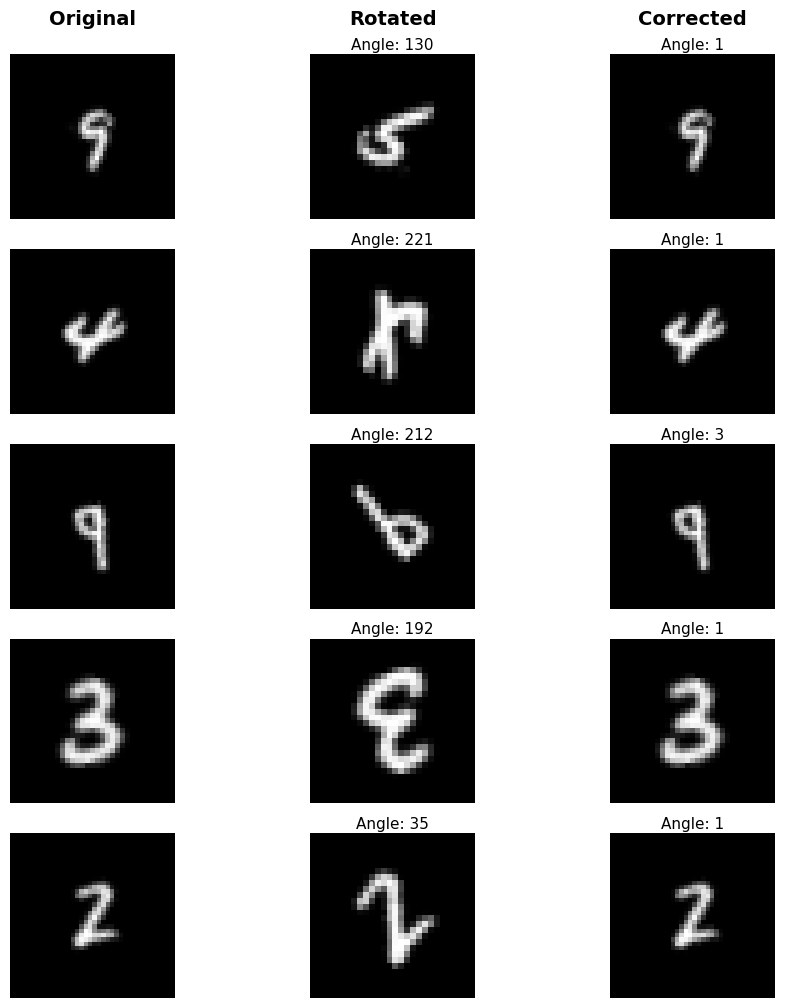

In [5]:
num_images = 5

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)